# State Estimation Using Particle Filter Algorithm

In [1]:
import numpy as np
import random
import math

In [2]:
class ParticleFilter:
    def __init__(self, N_density = None, GPS = None, GPS_accuracy_radius = None):
        if N_density:
            self.N_density = N_density # number of initial particles
        else:
            self.N_density = 10000
        self.GPS_accuracy_radius = GPS_accuracy_radius
        self.confidence_volume = 4/3 * math.pi * self.GPS_accuracy_radius**3
        self.N = self.N_density * self.confidence_volume

        self.old_distances = np.zeros((1,self.N))
        self.new_distances = np.zeros((1,self.N))
        
        if not GPS:
            self.X_GPS_curr = np.zeros((1,3), dtype=float) # current time step
            self.X_GPS_prev = np.zeros((1,3), dtype=float) # previous time step
        else:
            self.X_GPS = GPS
        self.V_GPS = np.zeros((1,3), dtype=float)
        
        self.particles_curr = np.zeros((self.N, 6), dtype=float)
        self.particles_old = np.zeros((self.N, 6), dtype=float)

    def _in_sphere(self, center, radius, point):
        # TODO: Remain outside the new sphere 
        if math.sqrt((point[0] - center[0]) * (point[0] - center[0]) + (point[1] - center[1]) * (point[1] - center[1]) + (point[2] - center[2]) * (point[2] - center[2])) <= radius:
            return True
        return False
    
    def _got_closer(prev_GPS, new_GPS, point):
        pass
    def _update_distances(self):
        N = np.shape(self.old_distances)

        for i in range(0,N):
            self.new_distances[i] = np.linalg.norm(self.X_GPS_curr - self.particles_curr[i])
            self.old_distances[i] = np.linalg.norm(self.X_GPS_prev - self.particles_old[i])

    def _got_closer(self, point):
        if self.new_distances[point] >= self.old_distances[point]:
            return False
        else:
            return True
        # TODO: Particles which got further away from X_GPS than getting closer

    def update_GPS_location(self, new_coordinates):
        self.X_GPS_prev = self.X_GPS_curr
        self.X_GPS_curr = new_coordinates

    def update_weights(self, new_GPS, particle):
        #TODO: Update weights as per (i) sense of direction and (ii) closeness to the center.
        direction = np.dot()
        distance = np.linalg.norm()

        

        return


    def progress_particles(self, A):
        self.particles_old = self.particles_curr
        # Update the states of each particle using physics.
        A_translational = A[6][6]
        #TODO add randomized noise upon state translation of particles for each particle
        for i in range(len(self.particles_curr)):
            self.particles_curr[i] = A_translational @ self.particles_curr[i].T
        

    def filter_particles(self,time_step):
        """
        TODO: filter out the particles that 
        (i)     Remain outside the new sphere 
        (ii)    Particles which got further away from X_GPS than getting closer
        (iii)   Update weights proportional to how closer they got compared to previously
        """
        preserved = []

        for i, particle in enumerate(self.particles):
            if self._in_sphere(self.X_GPS_curr, self.GPS_accuracy_radius, particle) == True and self._got_closer(i) == True:
                preserved.append(i)
        
        temp = np.zeros((len(preserved), 6), dtype=float)
        for i, preserved_index in enumerate(preserved):
            temp[i] = self.particles_curr[preserved_index]

        return self.particles

    def monte_carlo_sampling(self, time_step):
        """
        TODO:   Update the class variable particles to do a monte carlo resampling.
                With increasing time_step the number of rows in self.particles must reduce until it reaches 1 -> convergence
        """
        
        # base step
        if time_step == 0: 
            list1 = [random.randrange(self.X_GPS[i] - self.GPS_accuracy[i], self.X_GPS[i] + self.GPS_accuracy[i]) for i in range(0,3)]
        else:
            pass
        
        return self.particles
        
            

# Usage:

In [ ]:
filter = ParticleFilter()
for time_step in range(1, 100000):
    filter.update_GPS_location() # coming from the c++ library
    filter.filter_particles(time_step)
    filter.update_weights() 
    filter.monte_carlo_sampling(time_step)

In [8]:
particles = np.diag([1,2,3,4,5])
count = 0
for particle in particles:
    print(f"particle = {particle}")
    count += 1

for i, particle in enumerate(particles):
    print(f"i = {i}")
    print(f"particle = {particle}")

particle = [1 0 0 0 0]
particle = [0 2 0 0 0]
particle = [0 0 3 0 0]
particle = [0 0 0 4 0]
particle = [0 0 0 0 5]
i = 0
particle = [1 0 0 0 0]
i = 1
particle = [0 2 0 0 0]
i = 2
particle = [0 0 3 0 0]
i = 3
particle = [0 0 0 4 0]
i = 4
particle = [0 0 0 0 5]


In [12]:
particles_curr = [1,2,3,4,5]
for i in particles_curr:
            i = 2 * i

In [13]:
particles_curr

[1, 2, 3, 4, 5]

In [14]:
for i in range(0,len(particles_curr)):
            particles_curr[i] = 2 * particles_curr[i]

In [15]:
particles_curr

[2, 4, 6, 8, 10]

In [5]:
import numpy as np

def _got_closer(prev_GPS, new_GPS, point):
    print(np.linalg.norm(np.array(prev_GPS) - np.array(point)))
    print(np.linalg.norm(np.array(new_GPS) - np.array(point)))
    if (np.linalg.norm(np.array(prev_GPS) - np.array(point))) >= (np.linalg.norm(np.array(new_GPS) - np.array(point))):
        return False
    else:
        return True

prevState = [1,2,3]
currParticle = [2,3,4]
newState = [3,5,6]


currStatus = _got_closer(prevState, currParticle, newState)
print(currStatus)

4.69041575982343
3.0
False


# Filters:

## Low Pass Filter:
Complimentary like filter: alpha*signal[i] + (1-alpha)*(signal[i])

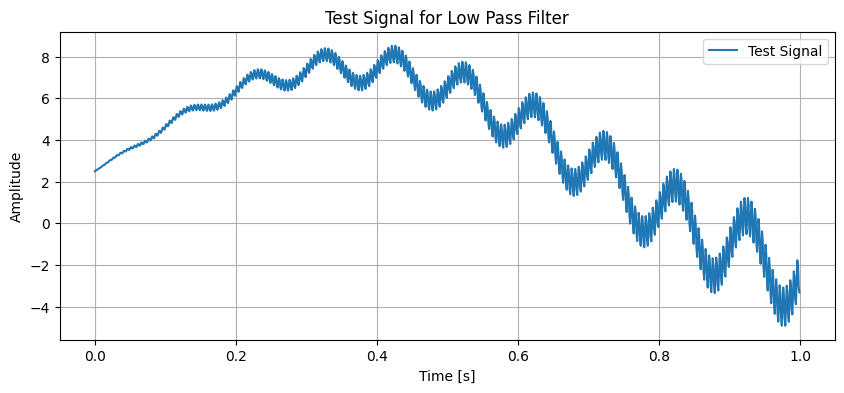

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(duration=1, sampling_rate=1000, low_freq=10, high_freq=200, low_amp=0.5):
    """Generate a test signal with low and high-frequency components."""
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal = ((2*t) * np.sin(2 * np.pi * low_freq * t)) + (low_amp / 0.2 + t * np.sin(2 * np.pi * high_freq * t)) + (5 * np.sin(2 * np.pi * t * 0.7))
    return t, signal

def plot_signal(t, signal):
    """Plot the generated signal."""
    plt.figure(figsize=(10, 4))
    plt.plot(t, signal, label='Test Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Test Signal for Low Pass Filter')
    plt.legend()
    plt.grid()
    plt.show()


t, signal = generate_signal()
plot_signal(t, signal)

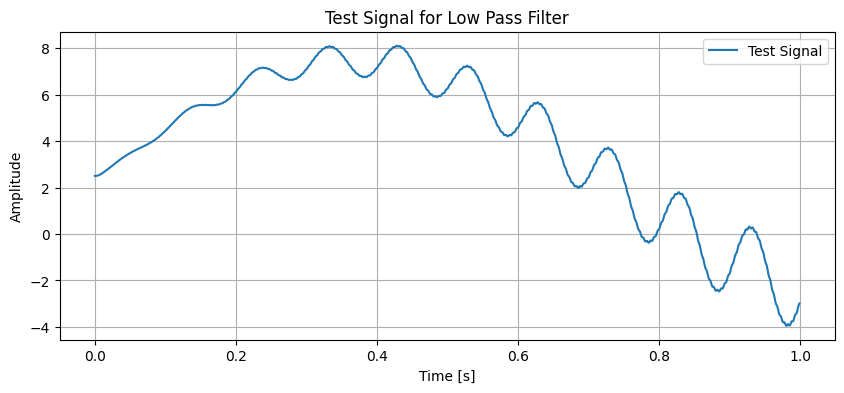

In [32]:
gamma = 0.5
for i, element in enumerate(signal):
    if i==0:
        signal[i]=signal[i]
    else:
        signal[i]=gamma*signal[i]+(1-gamma)*signal[i-1]
plot_signal(t,signal)
